In [297]:
import glob
import os
import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import squareform
from sklearn.decomposition import PCA

In [173]:
pattern = os.path.join("..", "data", "*")
files = glob.glob(pattern)

In [174]:
cur_dic = {}
for file in files:
    key = os.path.basename(file).split("-")[0]
    cur_dic[key] = pd.read_csv(file, index_col=["snapped_at"], parse_dates=["snapped_at"])
print(cur_dic.keys())

dict_keys(['xlm', 'btc', 'usdt', 'xtz', 'zec', 'ltc', 'doge', 'bch', 'xmr', 'trx', 'zrx', 'qtum', 'dash', 'omg', 'mkr', 'vet', 'eos', 'eth', 'miota', 'waves', 'neo', 'bat', 'etc', 'ont', 'bnb', 'dcr', 'xrp', 'ada', 'lsk', 'bsv'])


In [175]:
cur_dic["xlm"].head()

,price,market_cap,total_volume
snapped_at,,,
2014-08-06 00:00:00+00:00,0.272039,9.846548e+07,3.167553e+06
2014-08-07 00:00:00+00:00,0.256488,1.106719e+08,1.481922e+07
2014-08-08 00:00:00+00:00,0.310399,1.357487e+08,9.372817e+06
2014-08-09 00:00:00+00:00,0.357446,1.689086e+08,2.388705e+07
2014-08-10 00:00:00+00:00,0.519785,2.633191e+08,3.466722e+07


In [176]:
cur_dic["btc"].index

DatetimeIndex(['2013-04-28 00:00:00+00:00', '2013-04-29 00:00:00+00:00',
               '2013-04-30 00:00:00+00:00', '2013-05-01 00:00:00+00:00',
               '2013-05-02 00:00:00+00:00', '2013-05-03 00:00:00+00:00',
               '2013-05-04 00:00:00+00:00', '2013-05-05 00:00:00+00:00',
               '2013-05-06 00:00:00+00:00', '2013-05-07 00:00:00+00:00',
               ...
               '2019-12-25 00:00:00+00:00', '2019-12-26 00:00:00+00:00',
               '2019-12-27 00:00:00+00:00', '2019-12-28 00:00:00+00:00',
               '2019-12-29 00:00:00+00:00', '2019-12-30 00:00:00+00:00',
               '2019-12-31 00:00:00+00:00', '2020-01-01 00:00:00+00:00',
               '2020-01-02 00:00:00+00:00', '2020-01-03 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='snapped_at', length=2440, freq=None)

In [177]:
date_key = pd.date_range(start='2013-01-01 00:00:00+00:00', end='2020-01-03 00:00:00+00:00', freq='D')
print(date_key)
price_df = pd.DataFrame(index=date_key)
market_cap = pd.DataFrame(index=date_key)
total_volume = pd.DataFrame(index=date_key)

DatetimeIndex(['2013-01-01 00:00:00+00:00', '2013-01-02 00:00:00+00:00',
               '2013-01-03 00:00:00+00:00', '2013-01-04 00:00:00+00:00',
               '2013-01-05 00:00:00+00:00', '2013-01-06 00:00:00+00:00',
               '2013-01-07 00:00:00+00:00', '2013-01-08 00:00:00+00:00',
               '2013-01-09 00:00:00+00:00', '2013-01-10 00:00:00+00:00',
               ...
               '2019-12-25 00:00:00+00:00', '2019-12-26 00:00:00+00:00',
               '2019-12-27 00:00:00+00:00', '2019-12-28 00:00:00+00:00',
               '2019-12-29 00:00:00+00:00', '2019-12-30 00:00:00+00:00',
               '2019-12-31 00:00:00+00:00', '2020-01-01 00:00:00+00:00',
               '2020-01-02 00:00:00+00:00', '2020-01-03 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=2559, freq='D')


In [178]:
for key, val in cur_dic.items():
    price_df[key] = val["price"]
    market_cap[key] = val["market_cap"]
    total_volume[key] = val["total_volume"]

In [179]:
def fill(df):
#     df.interpolate(inplace=True)
#     df.fillna(0, inplace=True)
    rdf = df.dropna(how='all')
    return rdf

In [180]:
price_df = fill(price_df)
market_cap = fill(market_cap)
total_volume = fill(total_volume)

In [181]:
price_df.head()

,xlm,btc,usdt,xtz,zec,ltc,doge,bch,xmr,trx,...,neo,bat,etc,ont,bnb,dcr,xrp,ada,lsk,bsv
2013-04-28 00:00:00+00:00,NaN,13203.1967,NaN,NaN,NaN,417.499603,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-29 00:00:00+00:00,NaN,14108.4087,NaN,NaN,NaN,433.128147,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30 00:00:00+00:00,NaN,13629.7741,NaN,NaN,NaN,423.885975,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-01 00:00:00+00:00,NaN,11364.3607,NaN,NaN,NaN,363.773186,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-02 00:00:00+00:00,NaN,10350.6908,NaN,NaN,NaN,335.465889,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


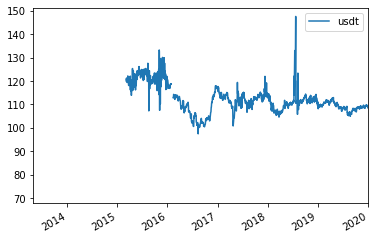

In [211]:
price_df[["usdt"]].plot()

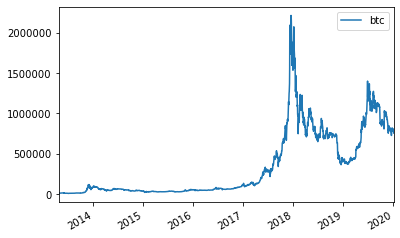

In [210]:
price_df[["btc"]].plot()

In [183]:
# 1日ごとの差分を求める
def get_diff(df):
    df = df.diff()
    df.dropna(how='all', inplace=True)
    return df

In [184]:
# 期間の指定
def designate_dur(df, start, end):
    rdf = df.reset_index()
    rdf = rdf[(rdf["index"] >= start) & (rdf["index"] <= end)]
    rdf.set_index("index", inplace=True, drop=True)
    return rdf

In [203]:
diff_price = get_diff(price_df)
start = pd.to_datetime('2018-01-01', utc=True)
end = pd.to_datetime('2018-12-31', utc=True)
diff_price = designate_dur(diff_price, start, end)
diff_price = diff_price.dropna(how='all', axis=1)

In [204]:
autocorrs = [diff_price["btc"].autocorr(lag=i) for i in range(60)]
print("max: {}, index: {}".format(np.max(autocorrs[1:]), np.argmax(autocorrs[1:])))

max: 0.20022368379638572, index: 53


In [205]:
diff_price

,xlm,btc,usdt,xtz,zec,ltc,doge,bch,xmr,trx,...,neo,bat,etc,ont,bnb,dcr,xrp,ada,lsk,bsv
index,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00+00:00,15.708216,-83300.353706,-0.290680,40.868961,10193.306589,-788.643984,-0.054099,-12276.227813,431.536957,0.576968,...,242.368945,5.396747,451.398880,NaN,-42.436998,1283.129466,3.515039,-2.282265,26.760790,NaN
2018-01-02 00:00:00+00:00,6.163914,131239.467594,-1.078558,116.332290,-2123.628710,2651.300402,0.023123,21312.685064,2004.101402,3.258270,...,1062.153068,10.691690,587.015649,NaN,25.272476,-290.739856,15.205738,6.428728,66.613422,NaN
2018-01-03 00:00:00+00:00,36.416283,34594.926258,1.669514,186.449476,188.001824,-704.041248,0.031993,1266.491504,2234.109551,1.965253,...,1559.606784,10.147592,185.139451,NaN,92.649485,-86.388260,76.308900,30.454551,-109.287516,NaN
2018-01-04 00:00:00+00:00,-13.427688,47006.940845,-1.289346,-101.537268,1678.741447,-318.117540,0.058793,-18891.990491,2299.260140,13.555038,...,-291.405722,-0.649970,446.435689,NaN,-22.007373,683.364569,11.189855,11.900999,117.610562,NaN
2018-01-05 00:00:00+00:00,-5.668980,271082.991694,-0.081003,-84.288428,-510.091995,1116.669049,0.425793,11100.052641,-1305.606382,1.587189,...,-161.345829,-7.948789,-960.873805,NaN,772.713156,286.372231,-31.779387,-11.164461,392.812827,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27 00:00:00+00:00,0.031682,5481.557905,0.920864,2.961117,49.671582,9.187581,0.005639,901.291986,-112.596788,0.085043,...,30.878131,0.338016,88.086696,-1.490577,30.135781,16.338093,0.139497,0.001697,1.300776,156.664569
2018-12-28 00:00:00+00:00,-1.247102,-22835.901592,-1.265287,-5.574057,-484.041587,-303.164413,-0.010200,-3036.515948,-487.631038,-0.217960,...,-106.048766,-1.412016,-75.571585,-9.415614,-49.699133,-175.184388,-4.452557,-0.373119,-12.397115,-1076.645401
2018-12-29 00:00:00+00:00,1.187138,27340.342097,0.248951,3.879404,617.766698,421.406347,0.007405,2349.706590,500.766814,0.231576,...,101.446693,1.094607,42.855504,6.640277,75.844393,359.285039,3.633680,0.377610,12.107789,848.136802


In [206]:
diff_price.corr()

,xlm,btc,usdt,xtz,zec,ltc,doge,bch,xmr,trx,...,neo,bat,etc,ont,bnb,dcr,xrp,ada,lsk,bsv
xlm,1.000000,0.490427,-0.026435,0.513645,0.473656,0.492192,0.420993,0.481834,0.453490,0.144933,...,0.547998,0.590920,0.549502,0.531061,0.397643,0.465701,0.666165,0.773855,0.468290,0.125153
btc,0.490427,1.000000,-0.068091,0.324557,0.511070,0.793988,0.664542,0.745319,0.625702,0.392397,...,0.630387,0.543316,0.518465,0.449432,0.588754,0.670271,0.431262,0.569204,0.688695,0.308073
usdt,-0.026435,-0.068091,1.000000,0.023765,-0.068098,-0.039702,-0.036259,-0.049418,-0.055195,-0.054343,...,-0.019808,0.007268,-0.023528,-0.006387,-0.003107,-0.001421,-0.006125,-0.016396,-0.006665,-0.006931
xtz,0.513645,0.324557,0.023765,1.000000,0.279412,0.363690,0.175466,0.324229,0.336969,0.067315,...,0.264292,0.345945,0.412520,0.285869,0.213401,0.294077,0.434092,0.434368,0.251372,0.325556
zec,0.473656,0.511070,-0.068098,0.279412,1.000000,0.599674,0.617961,0.579518,0.533846,0.250397,...,0.433088,0.467132,0.519124,0.422688,0.391454,0.536684,0.640568,0.461909,0.681834,0.142027
ltc,0.492192,0.793988,-0.039702,0.363690,0.599674,1.000000,0.628290,0.730937,0.615161,0.211361,...,0.613400,0.600992,0.617335,0.456422,0.555456,0.618889,0.472625,0.531083,0.720172,0.211398
doge,0.420993,0.664542,-0.036259,0.175466,0.617961,0.628290,1.000000,0.550156,0.458082,0.344774,...,0.395546,0.468642,0.386176,0.257766,0.518855,0.483128,0.505431,0.490073,0.688315,-0.044870
bch,0.481834,0.745319,-0.049418,0.324229,0.579518,0.730937,0.550156,1.000000,0.549219,0.217374,...,0.590685,0.561539,0.582792,0.473682,0.396145,0.549133,0.392800,0.517165,0.658671,0.417554
xmr,0.453490,0.625702,-0.055195,0.336969,0.533846,0.615161,0.458082,0.549219,1.000000,0.287991,...,0.652589,0.693244,0.611426,0.403750,0.260497,0.670434,0.436071,0.518757,0.584245,0.322310
trx,0.144933,0.392397,-0.054343,0.067315,0.250397,0.211361,0.344774,0.217374,0.287991,1.000000,...,0.148907,0.205858,0.287874,0.537925,0.042310,0.284375,0.442685,0.472007,0.248455,0.225528


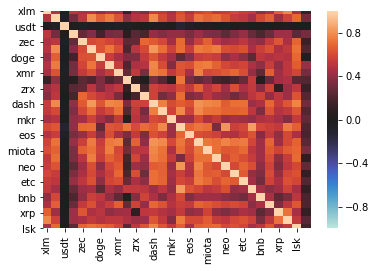

In [207]:
sns.heatmap(diff_price.corr(), vmax=1, vmin=-1, center=0)

In [214]:
def transform_variable(x):
    return np.sqrt(2*(1-x))

In [215]:
# 距離の公理を満たすために変数変換
# x = √(2(1-ρ))
corr_diff_price = diff_price.corr()
tran_corr_diff_price = corr_diff_price.apply(transform_variable)

In [216]:
tran_corr_diff_price

,xlm,btc,usdt,xtz,zec,ltc,doge,bch,xmr,trx,...,neo,bat,etc,ont,bnb,dcr,xrp,ada,lsk,bsv
xlm,0.000000,1.009528,1.432784,0.986261,1.026005,1.007778,1.076111,1.018004,1.045476,1.307721,...,0.950791,0.904521,0.949208,0.968441,1.097595,1.033730,0.817111,0.672525,1.031223,1.322760
btc,1.009528,0.000000,1.461568,1.162276,0.988869,0.641891,0.819095,0.713696,0.865215,1.102364,...,0.859782,0.955703,0.981361,1.049350,0.906914,0.812070,1.066525,0.928220,0.789057,1.176373
usdt,1.432784,1.461568,0.000000,1.397308,1.461573,1.442014,1.439625,1.448736,1.452718,1.452132,...,1.428151,1.409065,1.430754,1.418723,1.416409,1.415218,1.418538,1.425760,1.418919,1.419106
xtz,0.986261,1.162276,1.397308,0.000000,1.200490,1.128105,1.284161,1.162558,1.151548,1.365786,...,1.213019,1.143726,1.083956,1.195099,1.254272,1.188211,1.063868,1.063609,1.223624,1.161416
zec,1.026005,0.988869,1.461573,1.200490,0.000000,0.894792,0.874115,0.917041,0.965561,1.224421,...,1.064812,1.032345,0.980690,1.074534,1.103219,0.962617,0.847859,1.037392,0.797704,1.309941
ltc,1.007778,0.641891,1.442014,1.128105,0.894792,0.000000,0.862218,0.733570,0.877313,1.255897,...,0.879318,0.893317,0.874831,1.042668,0.942915,0.873054,1.027010,0.968419,0.748102,1.255868
doge,1.076111,0.819095,1.439625,1.284161,0.874115,0.862218,0.000000,0.948519,1.041074,1.144750,...,1.099503,1.030881,1.107992,1.218388,0.980964,1.016732,0.994554,1.009878,0.789538,1.445594
bch,1.018004,0.713696,1.448736,1.162558,0.917041,0.733570,0.948519,0.000000,0.949506,1.251101,...,0.904782,0.936441,0.913464,1.025980,1.098958,0.949597,1.101999,0.982685,0.826231,1.079301
xmr,1.045476,0.865215,1.452718,1.151548,0.965561,0.877313,1.041074,0.949506,0.000000,1.193322,...,0.833560,0.783270,0.881560,1.092016,1.216144,0.811870,1.062007,0.981064,0.911872,1.164208
trx,1.307721,1.102364,1.452132,1.365786,1.224421,1.255897,1.144750,1.251101,1.193322,0.000000,...,1.304678,1.260271,1.193421,0.961327,1.383973,1.196348,1.055760,1.027612,1.226006,1.244566


In [233]:
def from_adj_to_edge(df):
    li = df.values.tolist()
    label = df.index.tolist()
    from_l = []
    to_l = []
    w_l = []
    for i in range(len(li)):
        for j in range(i + 1, len(li)):
            from_l.append(label[i])
            to_l.append(label[j])
            w_l.append(li[i][j])
    rdf = pd.DataFrame()
    rdf["from"] = from_l
    rdf["to"] = to_l
    rdf["weight"] = w_l
    return rdf

In [272]:
edge_df = from_adj_to_edge(tran_corr_diff_price)

In [235]:
edge_df

,from,to,weight
0,xlm,btc,1.009528
1,xlm,usdt,1.432784
2,xlm,xtz,0.986261
3,xlm,zec,1.026005
4,xlm,ltc,1.007778
...,...,...,...
430,xrp,lsk,1.044249
431,xrp,bsv,1.330010
432,ada,lsk,0.971381
433,ada,bsv,1.233657


In [236]:
G = nx.from_pandas_adjacency(tran_corr_diff_price)

# 全域最小木

In [237]:
T = nx.minimum_spanning_tree(G)
print(sorted(T.edges(data=True)))

[('bch', 'bsv', {'weight': 1.0793014551473585}), ('bch', 'dash', {'weight': 0.6670644732489939}), ('btc', 'ltc', {'weight': 0.6418913191799888}), ('dash', 'dcr', {'weight': 0.7873806148144781}), ('dash', 'eth', {'weight': 0.6149230737420079}), ('dash', 'lsk', {'weight': 0.6747379866682792}), ('dash', 'miota', {'weight': 0.6631416667711042}), ('dash', 'mkr', {'weight': 0.8914009652621271}), ('dash', 'waves', {'weight': 0.6903194242946389}), ('doge', 'lsk', {'weight': 0.7895379929096368}), ('eth', 'bat', {'weight': 0.7384292422360822}), ('eth', 'etc', {'weight': 0.7166845163690835}), ('ltc', 'dash', {'weight': 0.5902971723949364}), ('omg', 'eth', {'weight': 0.6528098386686751}), ('omg', 'vet', {'weight': 0.6595693485260045}), ('qtum', 'vet', {'weight': 0.761456100256336}), ('trx', 'vet', {'weight': 0.7292571118817323}), ('usdt', 'xtz', {'weight': 1.3973079100251236}), ('vet', 'ada', {'weight': 0.7086723527872768}), ('vet', 'bnb', {'weight': 0.90227016658067}), ('vet', 'eos', {'weight': 0

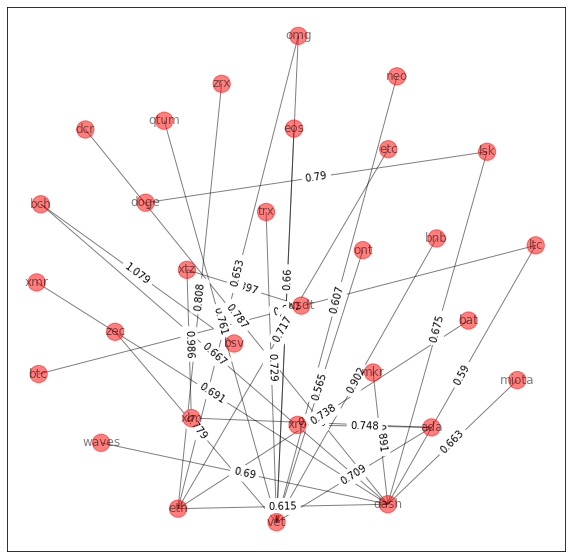

In [269]:
fig = plt.figure(figsize=(10,10))
node_color = ['r' for i in range(G.number_of_nodes())]
edge_labels = {(i, j): round(w["weight"],3) for i, j, w in T.edges(data=True)}
pos = nx.spring_layout(G, k=0.5, iterations=100)
nx.draw_networkx_edge_labels(T, pos, edge_labels=edge_labels)
nx.draw_networkx(T, pos, with_labels=True, alpha=0.5, node_color=node_color)

# クラスタリング

In [275]:
li = tran_corr_diff_price.values.tolist()
pdist = squareform(li)
label = tran_corr_diff_price.index.tolist()

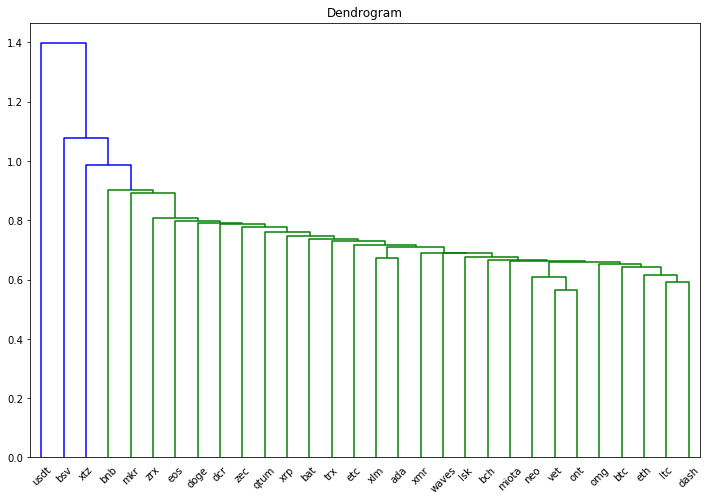

In [294]:
res = linkage(pdist)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
dendrogram(res, labels=label)
plt.title("Dendrogram")
locs, labels = plt.xticks()

In [312]:
pca = PCA(n_components=7)
x = corr_diff_price.values
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [313]:
cum_ratio = np.cumsum(pca.explained_variance_ratio_)

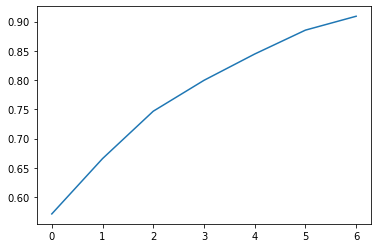

In [314]:
plt.plot(cum_ratio)

In [316]:
print(label)
print(pca.components_)

['xlm', 'btc', 'usdt', 'xtz', 'zec', 'ltc', 'doge', 'bch', 'xmr', 'trx', 'zrx', 'qtum', 'dash', 'omg', 'mkr', 'vet', 'eos', 'eth', 'miota', 'waves', 'neo', 'bat', 'etc', 'ont', 'bnb', 'dcr', 'xrp', 'ada', 'lsk', 'bsv']
[[-0.15893866 -0.20927133  0.17176156 -0.04886815 -0.1874366  -0.23650979
  -0.17568362 -0.21074436 -0.20742292 -0.03945498 -0.17256225 -0.13853997
  -0.23751836 -0.2329107  -0.13919973 -0.18476269 -0.17187958 -0.24360311
  -0.2181653  -0.22658434 -0.21805181 -0.21357735 -0.2018468  -0.12683566
  -0.11976273 -0.19651697 -0.10943322 -0.1536074  -0.21944736  0.02180462]
 [ 0.15758804 -0.06207426 -0.19486031  0.05117213  0.11350698 -0.10777643
  -0.07691015 -0.06081486 -0.09219994  0.50134317 -0.1973422   0.10066101
  -0.093774   -0.05423784 -0.17069124  0.35445181  0.12516469 -0.10071855
   0.02451925 -0.20697912 -0.0085598  -0.12477309  0.00519288  0.30766963
  -0.07956953 -0.13200542  0.34770587  0.29736598 -0.09212766 -0.00546804]
 [-0.05502858  0.09912859 -0.00872041 -